# Cooperating rates

In [1]:
import evol_dynamics

In [2]:
import pandas as pd
import dask.dataframe as dd

import numpy as np
import tqdm
import itertools

In [3]:
import matplotlib.pyplot as plt
import matplotlib

cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Greens"), 
         matplotlib.cm.get_cmap("Purples")]

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
import glob

In [5]:
import matplotlib.colors as colors

In [6]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [7]:
matplotlib.rc('font', **font)

**Generate plot across axis**

In [8]:
Ss = [2, 1.6, 1.2, 0.8, 0.4, 0, -0.4, -0.8, -1.2, -1.6, -2]
Ts = [-1, -0.6, -0.2,  0.2,  0.6,  1,  1.4,  1.8,  2.2,  2.6,  3]

In [9]:
sorted_cvs_files_expected = [f"../matlab/data/expected/clean_S_{S}_T_{T}_stochastic_0.csv" for S in Ss for T in Ts]

In [10]:
cooperation_rates_expected = np.zeros((11, 11))
scores_expected = np.zeros((11, 11))

In [11]:
for i, file in enumerate(sorted_cvs_files_expected):
    x = int(i / 11)
    y = i % 11
    
    df = pd.read_csv(file)
    
    cooperation_rates_expected[int(x), int(y)] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
    scores_expected[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

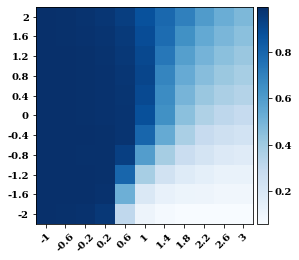

In [12]:
fig, axes = plt.subplots()

im = axes.imshow(cooperation_rates_expected, cmap=cmaps[0])

axes.set_xticks(range(11))
axes.set_yticks(range(11))

axes.set_xticklabels(Ts, rotation=45)
axes.set_yticklabels(Ss)

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

fig.savefig("../static/expected_two_by_two_games_cooperation.pdf", bbox_inches='tight')

**Similar for stochastic payoffs**

In [13]:
sorted_cvs_files_stochastic = [f"../matlab/data/stochastic/clean_S_{S}_T_{T}_stochastic_1.csv" for S in Ss for T in Ts]

In [14]:
cooperation_rates_stoch = np.zeros((11, 11))
scores_stoch = np.zeros((11, 11))

In [15]:
for i, file in enumerate(sorted_cvs_files_stochastic):
    x = int(i / 11)
    y = i % 11
    
    df = dd.read_csv(file)
    
    cooperation_rates_stoch[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
    scores_stoch[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

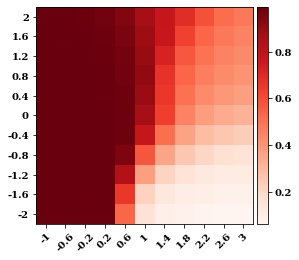

In [16]:
fig, axes = plt.subplots()

im = axes.imshow(cooperation_rates_stoch, cmap=cmaps[1])

axes.set_xticks(range(11))
axes.set_yticks(range(11))

axes.set_xticklabels(Ts, rotation=45)
axes.set_yticklabels(Ss)

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

fig.savefig("../static/stochastic_two_by_two_games_cooperation.pdf", bbox_inches='tight')

In [17]:
cooperation_difference = cooperation_rates_stoch - cooperation_rates_expected

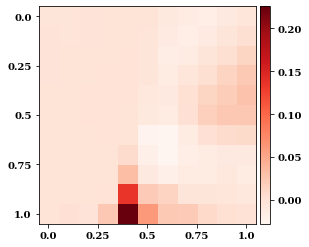

In [18]:
fig, axes = plt.subplots()

im = axes.imshow(cooperation_difference, cmap=cmaps[1])

axes.set_xticks(np.linspace(0, 10, 5))
axes.set_yticks(np.linspace(0, 10, 5))

axes.set_xticklabels(np.linspace(0, 1, 5))
axes.set_yticklabels(np.linspace(0, 1, 5))



divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

**Round Two**

In [19]:
sorted_cvs_files_rounds = [f"../matlab/data/round_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [26]:
cooperation_rates_rounds = np.zeros((11, 11))

In [44]:
for i, file in enumerate(sorted_cvs_files_rounds):
    x = int(i / 11)
    y = i % 11
    
    df = pd.read_csv(file)
    
    cooperation_rates_rounds[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))

In [45]:
df.head()

,y,p,q,average cooperation rate,t,frequencies
0,0.000000,0.000000,0.000000,0.000000,0,1242
1,0.523645,0.878322,0.025548,0.350731,1242,16
2,0.389607,0.114721,0.726231,0.899488,1258,4
3,0.473589,0.023565,0.615950,0.772095,1262,29
4,0.714759,0.164759,0.120426,0.252163,1291,136


In [46]:
df.describe()

,y,p,q,average cooperation rate,t,frequencies
count,38860.000000,38860.000000,38860.000000,38860.000000,3.886000e+04,38860.000000
mean,0.499681,0.504041,0.268211,0.699152,5.028362e+06,257.334020
std,0.288760,0.331423,0.293930,0.603046,2.896466e+06,783.366669
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,0.249916,0.193539,0.032830,0.149724,2.515138e+06,4.000000
50%,0.499341,0.474401,0.130248,0.543495,5.069825e+06,19.000000
75%,0.750490,0.842509,0.453315,1.141150,7.573498e+06,135.000000
max,0.999954,0.999995,0.999896,1.995886,9.999996e+06,19704.000000


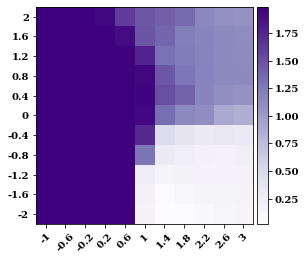

In [28]:
fig, axes = plt.subplots()

im = axes.imshow(cooperation_rates_rounds, cmap=cmaps[3])

axes.set_xticks(range(11))
axes.set_yticks(range(11))

axes.set_xticklabels(Ts, rotation=45)
axes.set_yticklabels(Ss)

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

fig.savefig("../static/rounds_two_by_two_games_cooperation.pdf", bbox_inches='tight')

**Opponents**

In [29]:
sorted_cvs_files_opponents = [f"../matlab/data/opponents_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [30]:
cooperation_rates_opp = np.zeros((11, 11))

In [31]:
for i, file in enumerate(sorted_cvs_files_opponents):
    x = int(i / 11)
    y = i % 11
    
    df = dd.read_csv(file)
    
    cooperation_rates_opp[x, y] = sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
#     scores_stoch[x, y] = sum(df['average score'] * (df['frequencies'] / 10 ** 7))

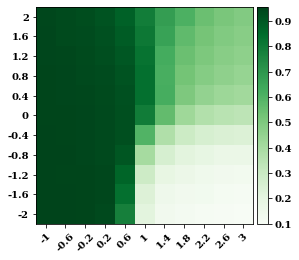

In [32]:
fig, axes = plt.subplots()

im = axes.imshow(cooperation_rates_opp, cmap=cmaps[2])


axes.set_xticks(range(11))
axes.set_yticks(range(11))

axes.set_xticklabels(Ts, rotation=45)
axes.set_yticklabels(Ss)

divider = make_axes_locatable(axes)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

fig.savefig("../static/opponents_two_by_two_games_cooperation.pdf", bbox_inches='tight')

**Rounds - opponents**

In [17]:
csv_files = glob.glob('matlab/data/rounds_opponents_two/S*csv')

In [18]:
columns = ['y', 'p', 'q', "average cooperation rate", 't']

In [20]:
# for file in tqdm.tqdm_notebook(csv_files):    
#     df = pd.read_csv(file, header=None)
#     df = df.drop_duplicates()
#     df.columns = columns
    
#     frequencies = []
#     previous = 0
#     for value in df['t'][1:]:
#         frequencies.append(value - previous)
#         previous = value
#     frequencies.append(10 ** 7 - previous)
    
#     df['frequencies'] = frequencies
    
#     df.to_csv(f"matlab/data/rounds_opponents_two/clean_{file[33:]}", index=False)

In [ ]:
sorted_cvs_files = [f"matlab/data/rounds_opponents_two/clean_S_{S}_T_{T}.csv" for S in Ss for T in Ts]

In [ ]:
fig, axes = plt.subplots(nrows=11, ncols=11, figsize=(50, 50));

for i, file in enumerate(sorted_cvs_files):
    
    try:
        df = dd.read_csv(file)
        
        text_file = open(file.replace("csv", "txt").replace("clean_", ""), "r")
        data = text_file.readlines()

        ps = df['p'].values.compute()
        qs = df['q'].values.compute()
        title = data[0].replace(",", "")[:-29]

        index = (int(i / 11), i % 11)

        heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=15)

        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        im = axes[index].imshow(heatmap.T, extent=extent, cmap=cmaps[1], origin="lower")

        divider = make_axes_locatable(axes[index])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(im, cax=cax, orientation='vertical')
        axes[index].set_title(title)

        axes[index].set_xticks(np.linspace(0, 1, 2))
        axes[index].set_yticks(np.linspace(0, 1, 2))
    
    except FileNotFoundError:
        pass
    

fig.savefig("matlab/images/merged_plot_rounds_opponents_two.pdf")